## Hotel Arabic-Reviews Dataset

Dans ce notebook, nous allons mettre en oeuvre une analyse générale de notre base de données en s'appuyant sur les axes suivants :

* [I- Importer les bibliothèques importantes](#chapter1)
* [II- Importer les données](#chapter2)
* [III- Caractéristiques des données ](#chapter3)
    * [1- Apercu des données](#section_3_1)
    * [2- Le nombre de lignes et colonnes](#section_3_2)
    * [3- Les valeurs manquantes](#section_3_3)
    * [4- Les doublons](#section_3_4)
    * [5- Le type des variables](#section_3_5)
* [IV- Analyse de données](#chapter4)
    * [1- La distribution des sentiments](#section_4_1)
    * [2- La taille des commentaires](#section_4_2)


Le lien correspond au téléchargement des données : [Hotel Arabic-Reviews Dataset](https://github.com/elnagara/HARD-Arabic-Dataset) 


## I- Importer les bibliothèques importantes <a class="anchor" id="chapter1"></a>

In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore")

## II- Importer les données <a class="anchor" id="chapter2"></a>

In [2]:
path_data = r"C:\Users\Mohammed\Documents\Projets\Cross lingual\HARD.xlsx"

HARD = pd.read_excel(path_data)

## III- Caractéristiques des données <a class="anchor" id="chapter3"></a>

Dans cette section, nous allons analyser les différentes caractéristiques des données tel que :

- Apercu des données
- Le nombre de lignes et colonnes
- Les valeurs manquantes
- Les doublons
- Le type des variables

In [3]:
data = HARD

### 1- Apercu des données <a class="anchor" id="section_3_1"></a>

In [4]:
data.head(3)

,no,Hotel name,rating,user type,room type,nights,review
0,2,فندق 72,2,مسافر منفرد,غرفة ديلوكس مزدوجة أو توأم,أقمت ليلة واحدة,“ممتاز”. النظافة والطاقم متعاون.
1,3,فندق 72,5,زوج,غرفة ديلوكس مزدوجة أو توأم,أقمت ليلة واحدة,استثنائي. سهولة إنهاء المعاملة في الاستقبال. ل...
2,16,فندق 72,5,زوج,-,أقمت ليلتين,استثنائي. انصح بأختيار الاسويت و بالاخص غرفه ر...


### 2- Le nombre de lignes et colonnes <a class="anchor" id="section_3_2"></a>

In [5]:
print("Data contient {} lignes et {} colonnes.".format(data.shape[0], data.shape[1]))

Data contient 105698 lignes et 7 colonnes.


|***Colonne :***  | no | Hotel name | <span style="color:red">Rating</span> |  User type | Room type |  Night |  <span style="color:red">Review</span> | 
|---|---|---|---|---|---|---|---|
| |   |   |   | | | |  |

### 3- Les valeurs manquantes <a class="anchor" id="section_3_3"></a>

In [6]:
data.isnull().sum()

no            0
Hotel name    0
rating        0
user type     0
room type     0
nights        0
review        0
dtype: int64

### 4- Les doublons <a class="anchor" id="section_3_4"></a>

In [7]:
print("On a  {} doublons dans Data.".format(data.duplicated().sum()))

On a  0 doublons dans Data.


### 5- Le type des variables <a class="anchor" id="section_3_5"></a>

In [8]:
data.dtypes

no             int64
Hotel name    object
rating         int64
user type     object
room type     object
nights        object
review        object
dtype: object

|***Colonne :***  | no | Hotel name | <span style="color:red">Rating</span> |  User type | Room type |  Night |  <span style="color:red">Review</span> | 
|---|---|---|---|---|---|---|---|
|***Type :***  | int64 | Object | <span style="color:blue">int64</span> | int64 |int64 | int64 |  <span style="color:blue">Objet</span> | 

## IV- Analyse de données <a class="anchor" id="chapter4"></a>

- Nous allons définir deux fonctions de visualisation pour simplifier la tâche dans les étapes suivantes.

In [9]:
def pie(data,col):
    labels = data[col].value_counts().keys().tolist()
    n = len(labels)
    if n==2:
        colors = ['#66b3ff', '#fb3999']
    elif n==3:
        colors = ['#66b3ff', '#fb3999', '#ffcc99']
    elif n==4:
        colors = ['#66b3ff', '#fb3999', '#ffcc99',"#66f3ff"]
    elif n==5:
        colors = ['#66b3ff', '#fb3999', '#ffcc99',"#66f3ff",'#adcc99']
    elif n==6:
        colors = ['#66b3ff', '#fb3999', '#ffcc99',"#66f3ff",'#adcc99',"#db7f23"]
    
    fig1, f1 = plt.subplots()
    f1.pie(data[col].value_counts(), labels=labels, colors = colors, autopct='%1.1f%%',shadow=False, startangle=60) 
    f1.axis('equal')
    plt.tight_layout()
    plt.show()
    
def histo(data,col):
    plt.figure(figsize = (10, 8))
    sns.histplot(data=data, x=col, hue = data[col], fill=True)

### 1- La distribution des sentiments <a class="anchor" id="section_4_1"></a>

In [10]:
data.rating.value_counts(normalize = True)

2    0.363933
4    0.250241
5    0.249759
1    0.136067
Name: rating, dtype: float64

|  ***Valeurs :*** |  1 | 2 | 4  | 5  |
|---|---|---|---|---|
|  ***Pourcentage :*** | 13.6% | 36.4%  | 25%  | 25%  |

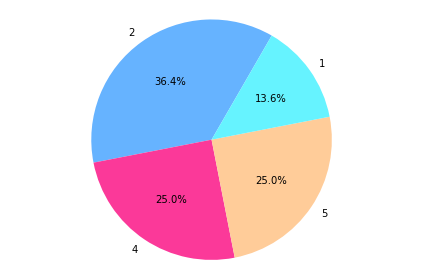

In [11]:
pie(data, "rating")

***Commentaire :***

- D'après les résultats obtenus, on peut conclure qu'on a ***une base de données équilibrée***.

Dans l'étape suivante, on va considérer que :

- Les reviews qui ont une note de 1 et 2 sont ***des reviews négatives***.
- Les reviews qui ont une note de 4 et 5 sont ***des reviews positives***.


In [12]:
positive_reviews = data[data["rating"] > 3]
positive_reviews["sentiment"] = 1

negative_reviews = data[data["rating"] < 3]
negative_reviews["sentiment"] = 0

data = pd.concat([positive_reviews, negative_reviews], ignore_index = True)

In [13]:
print("data contient {} lignes.".format(data.shape[0]))

print("Positive_reviews contient {} lignes.".format(positive_reviews.shape[0]))

print("Negative_reviews contient {} lignes.".format(negative_reviews.shape[0]))

data contient 105698 lignes.
Positive_reviews contient 52849 lignes.
Negative_reviews contient 52849 lignes.


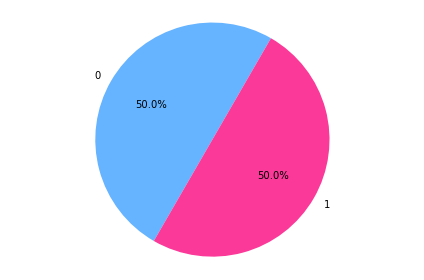

In [14]:
pie(data,"sentiment")

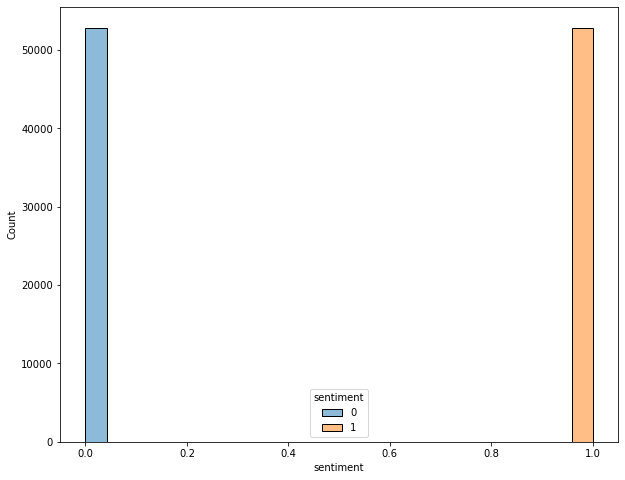

In [15]:
histo(data,"sentiment")

### 2- La taille des commentaires <a class="anchor" id="section_4_2"></a>

Dans le but d'avoir une idée générale sur le comportement des utilisateurs, la taille des commentaires peut nous donner un aperçu sur l'utilisation de la langue.

Or, même pour l'étape de la vectorisation des données, cette partie va nous donner une idée sur la taille des vecteurs et même du vocabulaire.

In [16]:
def compte_mots(phrase):
    return len(phrase.split())

data["len_review"] = data["review"].apply(compte_mots)
positive_reviews['len_review'] = positive_reviews["review"].apply(compte_mots)
negative_reviews['len_review'] = negative_reviews["review"].apply(compte_mots)

In [17]:
print("Le maximum de mots utilisé dans les reviews positives est :", max(positive_reviews.len_review))
print("Le maximum de mots utilisé dans les reviews négatives est :", max(negative_reviews.len_review))

Le maximum de mots utilisé dans les reviews positives est : 570
Le maximum de mots utilisé dans les reviews négatives est : 614


(0.0, 200.0)

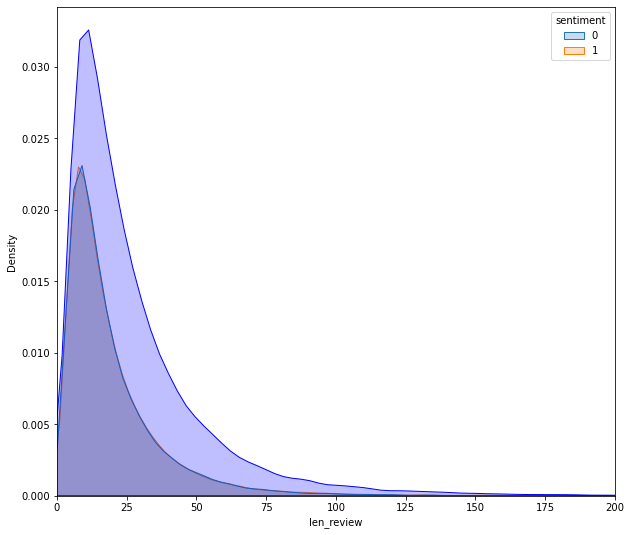

In [18]:
plt.figure(figsize=(10,9))

p1=sns.kdeplot(positive_reviews['len_review'], hue = data['sentiment'],  shade=True, color="r")
p1=sns.kdeplot(negative_reviews['len_review'], shade=True, color="b")

plt.xlim(0, 200)


***Commentaire :***

- On remarque qu'il y a le même comportement entre les utilisateurs.